In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [3]:
df = pd.read_csv('tripadvisor_review.csv')
X = df.iloc[:, 1:]
X

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


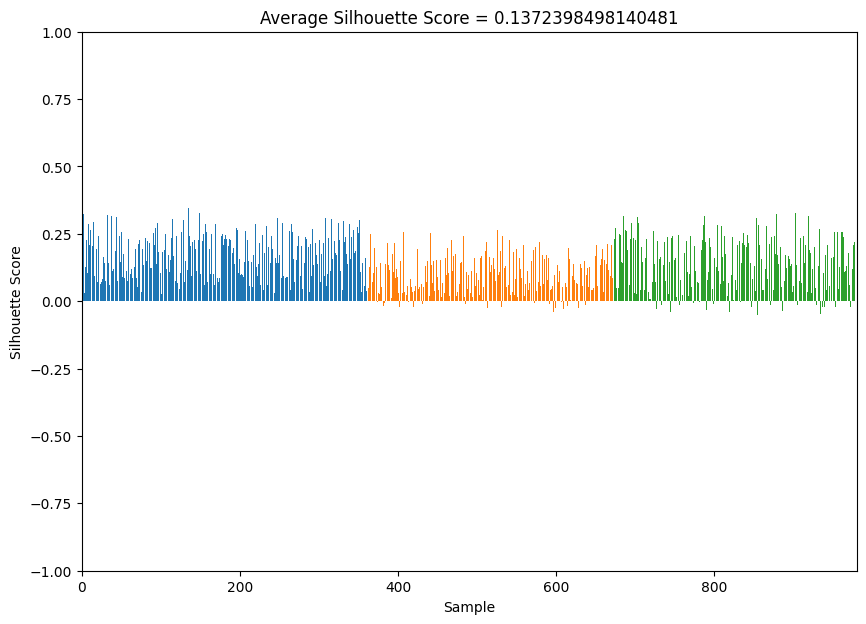

In [4]:
X = StandardScaler().fit_transform(X)
K = 3
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

plt.figure(figsize=(10, 7))

sample = 0
for i in range(0, K):
    sil = silhouette_values[cluster_labels == i]
    plt.bar(np.arange(sample, sample + sil.size), sil)
    sample += sil.size

plt.xlim([0, len(X)])
plt.ylim([-1, 1])

plt.xlabel('Sample')
plt.ylabel('Silhouette Score')
plt.title(f"Average Silhouette Score = {silhouette_avg}")

plt.show()

In [5]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca

array([[ 2.40757283, -0.07303858],
       [ 5.31123728, -0.02250014],
       [-0.80783928, -1.7769507 ],
       ...,
       [-1.06443926,  0.45864112],
       [-2.20098214, -1.95890684],
       [ 0.98252801, -0.37132355]])

In [6]:
# X = StandardScaler().fit_transform(X)
# K = 2
# kmeans = KMeans(n_clusters=K, n_init=10)
# kmeans.fit(X)
# cluster_labels = kmeans.labels_
# centroids = kmeans.cluster_centers_
# inertia = kmeans.inertia_
# silhouette_values = silhouette_samples(X, cluster_labels)
# silhouette_avg = silhouette_score(X, cluster_labels)

In [7]:
# # Initialize the matplotlib figure for the two subplots
# fig, ax1 = plt.subplots(1, 1)  # Using only one subplot for clustering visualization
# fig.set_size_inches(9, 7)
# fig.suptitle(f"Result for K = {K}")

# # Scatter plot for PCA-reduced data colored by cluster
# for i in range(0, K):
#     ax1.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], s=10, label=f'Cluster {i}')
# # ax1.scatter(centroids[:, 0], centroids[:, 1], s=50, color='black', edgecolor='k', label='Centroids')
# ax1.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')

# ax1.set_title(f"Inertia = {inertia}")
# ax1.grid()
# ax1.legend()

# # Show the plot
# plt.show()

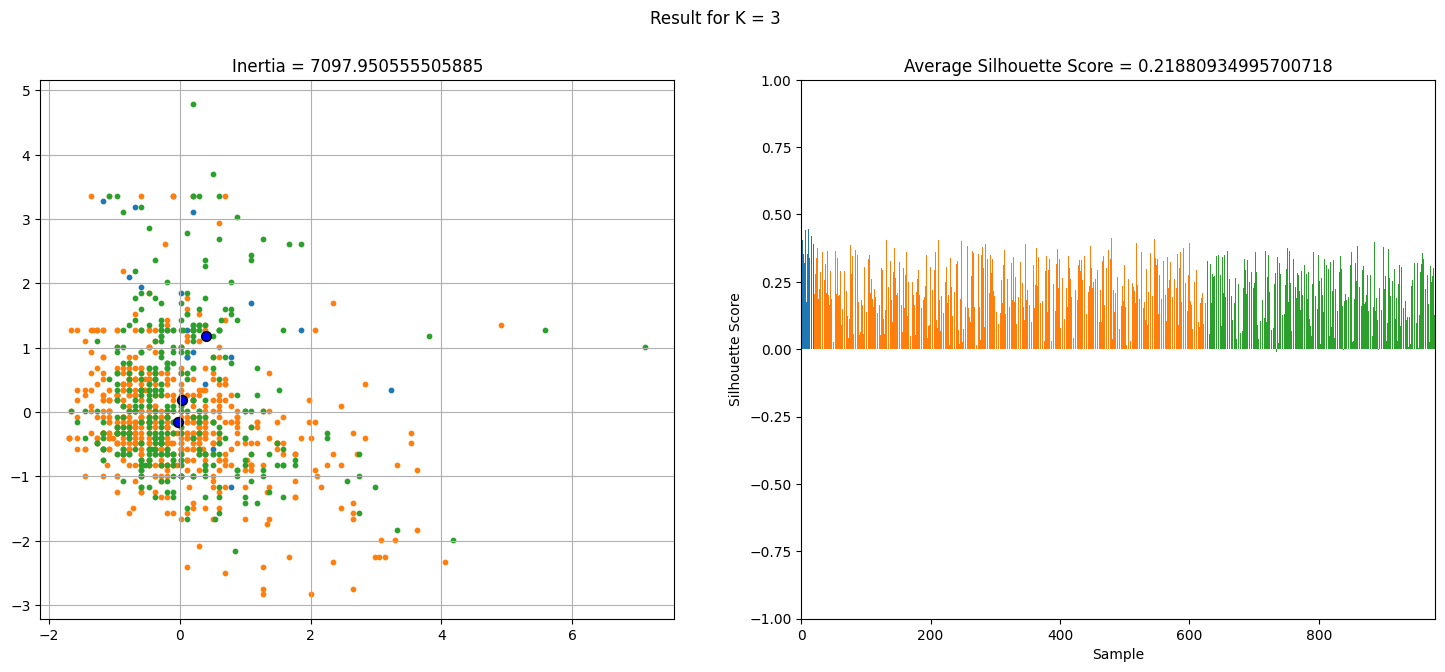

In [8]:
K = 3
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
silhouette_values = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
fig.suptitle(f"Result for K = {K}")
for i in range(0,K):
    ax1.scatter(X[cluster_labels == i,0], X[cluster_labels == i,1], s=10)
ax1.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
ax1.set_title(f"Inertia = {inertia}")
ax1.grid()
sample = 0
for i in range(0,K):
    sil = silhouette_values[cluster_labels == i]
    ax2.bar(np.arange(sample,sample + sil.size),sil)
    sample = sample + sil.size
ax2.axis([0, len(X), -1, 1])
ax2.set_xlabel('Sample')
ax2.set_ylabel('Silhouette Score')
ax2.set_title(f"Average Silhouette Score = {silhouette_avg}")
plt.show()

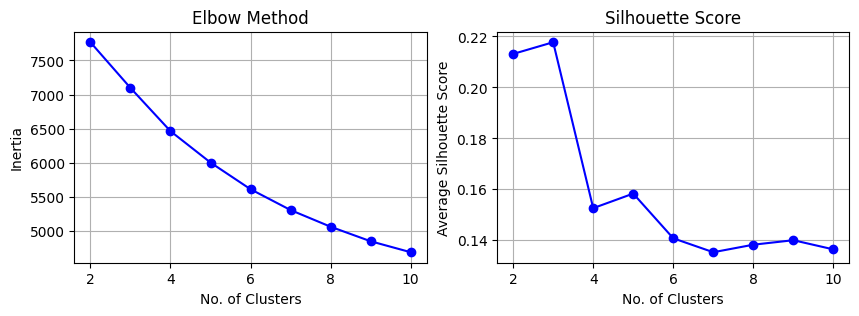

In [15]:
inertia_values = []
silhouette_avgs = []
# fig2 = plt.figure(figsize=(20,20))
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0).fit(X)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia_values.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    # ax = fig2.add_subplot(330 + i - 1)
    # for j in range(0,i):
    #     ax.scatter(X[cluster_labels == j,0], X[cluster_labels == j,1], s=10, alpha=0.3)
    # ax.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
    # ax.set_title(f"Inertia = {kmeans.inertia_}\nSilhouette Score = {silhouette_avg}")


plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(np.arange(2,11),inertia_values,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(122)
plt.plot(np.arange(2,11),silhouette_avgs,'o-b')
plt.grid()
plt.xlabel('No. of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')
plt.show()

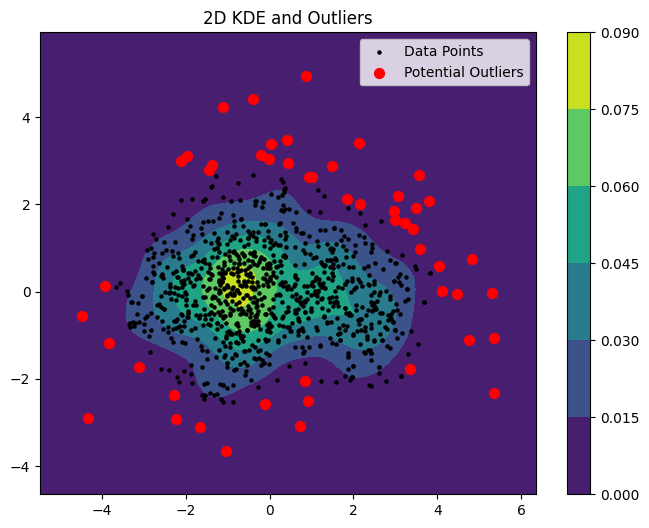

In [18]:
# import kernel density estimator
from sklearn.neighbors import KernelDensity

# Assuming X has already been standardized and PCA has been applied to reduce its dimensionality to 2
X_pca = PCA(n_components=2).fit_transform(X)

# Fit KDE to the 2D data
kde = KernelDensity(kernel='gaussian', bandwidth=0.4).fit(X_pca)

# Create a grid for visualization
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
Xp, Yp = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

# Score samples
Zp = np.exp(kde.score_samples(XY))  # convert log likelihood to likelihood
Zp = Zp.reshape(Xp.shape)

# Calculate the threshold for a 95% confidence interval
threshold = np.quantile(kde.score_samples(X_pca), 0.05)

# Plot the KDE and the data
plt.figure(figsize=(8, 6))
contour = plt.contourf(Xp, Yp, Zp, cmap='viridis')
plt.colorbar(contour)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, c='k', label='Data Points')

# Highlight potential outliers
outliers = X_pca[kde.score_samples(X_pca) < threshold]
plt.scatter(outliers[:, 0], outliers[:, 1], s=50, c='r', label='Potential Outliers')

plt.title('2D KDE and Outliers')
plt.legend()
plt.show()


In [36]:
df = pd.read_csv('water-treatment.data', header=None, na_values='?')
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
524,D-28/8/91,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0
525,D-29/8/91,32190.0,0.30,7.3,200.0,545.0,258.0,65.1,4.0,1260,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


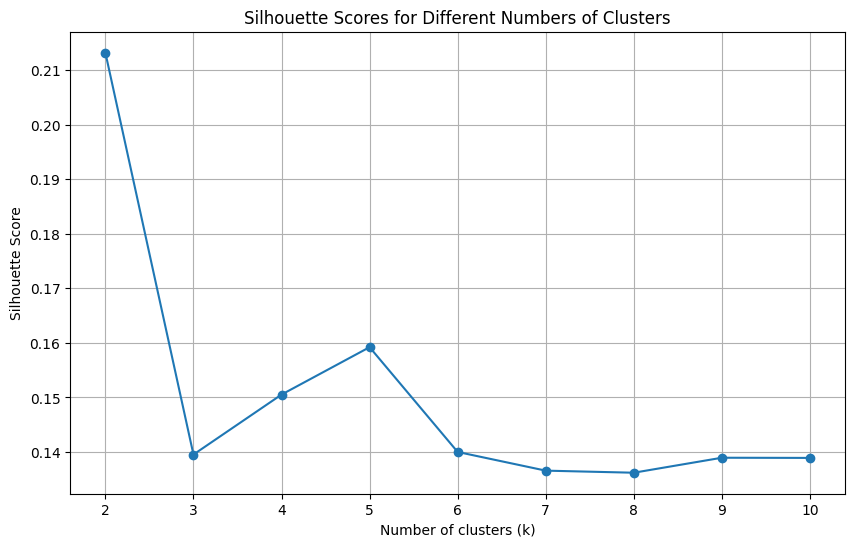

(2, 0.21315362778467906)

In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Trip Advisor Travel Reviews dataset
tripadvisor_data = pd.read_csv('tripadvisor_review.csv')
tripadvisor_data = tripadvisor_data.iloc[:, 1:]

# Standardizing the data for clustering
scaler = StandardScaler()
tripadvisor_scaled = scaler.fit_transform(tripadvisor_data)

# Finding the optimal number of clusters using silhouette score
silhouette_scores = []
k_range = range(2, 11)  # Trying different cluster numbers from 2 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(tripadvisor_scaled)
    silhouette_avg = silhouette_score(tripadvisor_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores for each K
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Selecting the best K based on the highest silhouette score
best_k = k_range[np.argmax(silhouette_scores)]
best_k, max(silhouette_scores)


In [47]:
X_pca = PCA(n_components=2).fit_transform(tripadvisor_scaled)
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)
silhouette_avg = silhouette_score(X_pca, cluster_labels)
silhouette_scores.append(silhouette_avg)

silhouette_avg


0.4333249083329387